<a href="https://colab.research.google.com/github/MRazin172/Speech_Processing/blob/main/2348534_SPR_LabProgram6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal:
To use DTW to align these vectors by analyzing their patterns.
DTW is particularly useful here as Vector 2 is both stretched and shifted compared to Vector 1.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.signal import find_peaks

here i am initializing the 2 signals

In [9]:
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

plotting the two vectors to see how different or similar they are

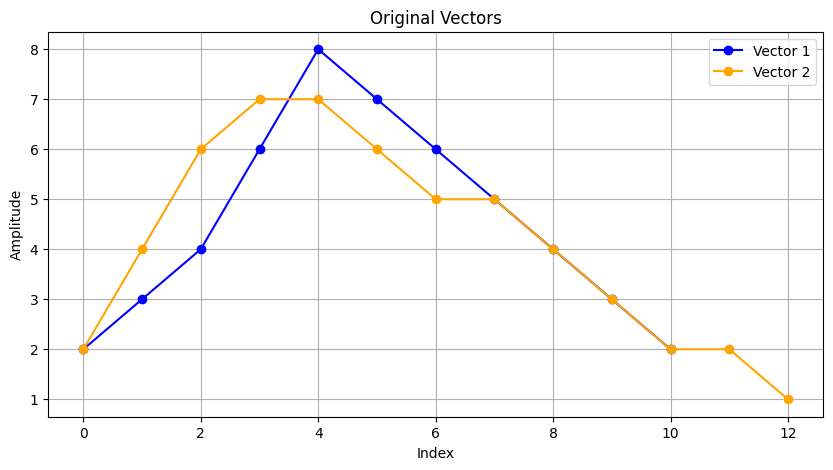

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(vector1, label='Vector 1', marker='o', color='blue')
plt.plot(vector2, label='Vector 2', marker='o', color='orange')
plt.title("Original Vectors")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

### **What the plot represents:**
1. **X-axis (Index):**
   - Represents the indices (positions) of elements in the vectors.

2. **Y-axis (Amplitude):**
   - Represents the values (amplitudes) at each index in the vectors.

3. **Two lines:**
   - **Blue line (Vector 1):**
     - The first numerical sequence, shorter in length and having distinct peaks and valleys.
   - **Orange line (Vector 2):**
     - The second numerical sequence, which is a stretched and slightly shifted version of Vector 1. It has more indices and appears smoother in some regions due to the stretching.

---

### **Key Observations:**
1. **Length Difference:**
   - **Vector 1** has fewer indices than **Vector 2**, indicating it is shorter.
   - **Vector 2** is stretched to include more data points.

2. **Shape Similarity:**
   - Both vectors have similar overall trends, with an increasing amplitude, a peak, and then a gradual decline.
   - The patterns are similar, but the alignment is not exact due to stretching and shifts.

3. **Purpose of the Plot:**
   - This visualization highlights the differences in length and alignment between the two vectors.



In [11]:
def compute_dtw(v1, v2):
    n, m = len(v1), len(v2)
    cost = np.zeros((n, m))

    # Compute cost matrix
    for i in range(n):
        for j in range(m):
            cost[i, j] = (v1[i] - v2[j]) ** 2

    # Accumulate cost matrix
    acc_cost = np.zeros((n, m))
    acc_cost[0, 0] = cost[0, 0]
    for i in range(1, n):
        acc_cost[i, 0] = acc_cost[i - 1, 0] + cost[i, 0]
    for j in range(1, m):
        acc_cost[0, j] = acc_cost[0, j - 1] + cost[0, j]
    for i in range(1, n):
        for j in range(1, m):
            acc_cost[i, j] = cost[i, j] + min(acc_cost[i - 1, j], acc_cost[i, j - 1], acc_cost[i - 1, j - 1])

    # Backtrack to find the warping path
    i, j = n - 1, m - 1
    path = [(i, j)]
    while i > 0 and j > 0:
        if acc_cost[i - 1, j] == min(acc_cost[i - 1, j], acc_cost[i, j - 1], acc_cost[i - 1, j - 1]):
            i -= 1
        elif acc_cost[i, j - 1] == min(acc_cost[i - 1, j], acc_cost[i, j - 1], acc_cost[i - 1, j - 1]):
            j -= 1
        else:
            i -= 1
            j -= 1
        path.append((i, j))
    while i > 0:
        i -= 1
        path.append((i, j))
    while j > 0:
        j -= 1
        path.append((i, j))
    path.reverse()

    return cost, acc_cost, path

In [12]:
cost_matrix, acc_cost_matrix, warping_path = compute_dtw(vector1, vector2)

# Extract DTW distance
dtw_distance = acc_cost_matrix[-1, -1]

The warping path is the sequence of steps that aligns the two vectors optimally.

The DTW distance is the total cost of aligning the two vectors. A smaller distance indicates greater similarity.

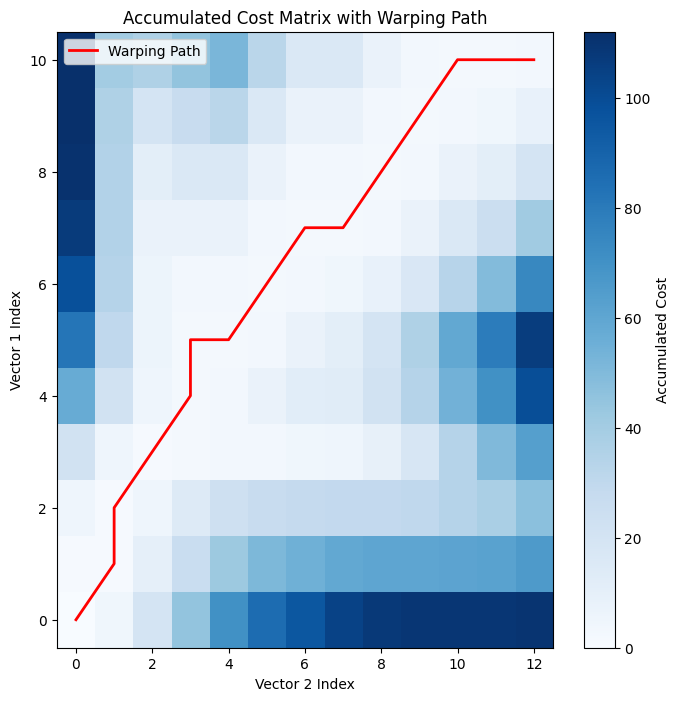

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(acc_cost_matrix, origin='lower', cmap='Blues', aspect='auto')
plt.colorbar(label="Accumulated Cost")
plt.title("Accumulated Cost Matrix with Warping Path")
plt.xlabel("Vector 2 Index")
plt.ylabel("Vector 1 Index")
path_x, path_y = zip(*warping_path)
plt.plot(path_y, path_x, color='red', linewidth=2, label='Warping Path')
plt.legend()
plt.show()



### **Key Components of the Plot:**

1. **X-axis (Vector 2 Index):**
   - Represents the indices of **Vector 2**, which is the longer sequence.

2. **Y-axis (Vector 1 Index):**
   - Represents the indices of **Vector 1**, the shorter sequence.

3. **Color Intensity (Accumulated Cost):**
   - The color scale (light to dark blue) indicates the accumulated cost values at each cell in the matrix:
     - **Light Blue:** Lower cost, meaning less alignment effort.
     - **Dark Blue:** Higher cost, meaning more alignment effort is required.

4. **Red Line (Warping Path):**
   - The optimal path found by DTW for aligning the two vectors.
   - Each point on the red line represents a mapping between an index in **Vector 1** and an index in **Vector 2**.

---

### **Key Observations:**

1. **Accumulated Cost Matrix:**
   - The matrix shows the cumulative cost of aligning every possible pair of points from the two vectors.
   - Lower costs (lighter regions) suggest better alignment with minimal distortion.

2. **Warping Path:**
   - The red line traces the alignment that minimizes the overall DTW distance.
   - It moves diagonally when both vectors align well and takes horizontal/vertical steps when stretching or compressing one vector to match the other.

3. **Stretch and Compression:**
   - Horizontal segments of the path indicate where **Vector 1** is stretched to align with consecutive indices of **Vector 2**.
   - Vertical segments indicate where **Vector 2** is stretched to align with consecutive indices of **Vector 1**.

4. **Boundary Alignment:**
   - The warping path starts at the bottom-left corner (index 0 of both vectors) and ends at the top-right corner (last index of both vectors), ensuring full alignment.

---

### **Inference:**
1. The **Warping Path** demonstrates how the two vectors are aligned optimally by stretching or compressing parts of one vector to match the other.


In [14]:
dtw_distance, warping_path


(3.0,
 [(0, 0),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 3),
  (5, 3),
  (5, 4),
  (6, 5),
  (7, 6),
  (7, 7),
  (8, 8),
  (9, 9),
  (10, 10),
  (10, 11),
  (10, 12)])

In (2, 1), the 3rd element in Vector 1 is aligned with the 2nd element in Vector 2.
Sometimes, an element in one vector aligns with multiple elements in the other, e.g., (10, 11) and (10, 12).

In [23]:
import numpy as np

# Define the two vectors
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

# Step 1: Initialize the cost matrix
n, m = len(vector1), len(vector2)
cost_matrix = np.zeros((n, m))

# Compute pairwise Euclidean distances
for i in range(n):
    for j in range(m):
        cost_matrix[i, j] = abs(vector1[i] - vector2[j])  # Euclidean distance

# Step 2: Initialize the accumulated cost matrix
accumulated_cost = np.zeros((n, m))
accumulated_cost[0, 0] = cost_matrix[0, 0]

# Fill in the first row and column
for i in range(1, n):
    accumulated_cost[i, 0] = accumulated_cost[i - 1, 0] + cost_matrix[i, 0]
for j in range(1, m):
    accumulated_cost[0, j] = accumulated_cost[0, j - 1] + cost_matrix[0, j]

# Fill in the rest of the accumulated cost matrix
for i in range(1, n):
    for j in range(1, m):
        accumulated_cost[i, j] = cost_matrix[i, j] + min(
            accumulated_cost[i - 1, j],     # Insertion
            accumulated_cost[i, j - 1],     # Deletion
            accumulated_cost[i - 1, j - 1]  # Match
        )

# Step 3: Trace back to find the warping path
i, j = n - 1, m - 1
path = [(i, j)]

while i > 0 or j > 0:
    if i == 0:
        j -= 1
    elif j == 0:
        i -= 1
    else:
        # Find the minimum accumulated cost neighbor
        min_cost_idx = np.argmin([
            accumulated_cost[i - 1, j],     # Up
            accumulated_cost[i, j - 1],     # Left
            accumulated_cost[i - 1, j - 1]  # Diagonal
        ])
        if min_cost_idx == 0:
            i -= 1
        elif min_cost_idx == 1:
            j -= 1
        else:
            i -= 1
            j -= 1
    path.append((i, j))

# Reverse the path to make it start-to-end
path = path[::-1]

# Step 4: Calculate DTW distance
dtw_distance = accumulated_cost[-1, -1]

# Output results
print("DTW Distance:", dtw_distance)
print("Warping Path:", path)


DTW Distance: 3.0
Warping Path: [(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (5, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9), (10, 10), (10, 11), (10, 12)]


### **Inference:**

#### **How does the warping path align the two vectors?**
The warping path shows how elements in **Vector 1** and **Vector 2** are aligned to minimize the total cost (difference). It stretches or compresses parts of the vectors to find the optimal alignment. For example:
- Some elements in **Vector 1** align with multiple elements in **Vector 2**, as seen in pairs like `(10, 11)` and `(10, 12)`.
- This adjustment ensures that even though **Vector 2** is longer and slightly shifted, it can still be aligned with **Vector 1** by skipping or repeating certain elements.

The warping path demonstrates that sequences with different lengths or slight distortions (e.g., time shifts) can still be aligned effectively.

---

#### **What does the DTW distance indicate about their similarity?**
The DTW distance of **3.0** indicates that the two vectors are **similar but not identical**. The small value suggests:
- The overall patterns of the two sequences are closely related, with minimal distortion.
- Despite differences in length and slight shifts, the sequences follow a comparable trajectory.

In summary:
- The warping path shows how the sequences can be adjusted to align optimally.
- The DTW distance quantifies their similarity, with a smaller value indicating a close match.